In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('~/Downloads/NYPD_Complaint_Data_Historic.csv')

/tmp/ipykernel_13417/2268714868.py:1: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('~/Downloads/NYPD_Complaint_Data_Historic.csv')


In [3]:
df.columns
# df.dtypes
# df.shape

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [4]:
# According to the data dictionary, CMPLNT_NUM (Complaint Number) is randomly generated and persistent.
# Is it unique?

df['CMPLNT_NUM'].is_unique

False

In [5]:
# It's not unique. That's unexpected.

df.duplicated(subset = 'CMPLNT_NUM').value_counts()

False    7821537
True        3962
dtype: int64

In [6]:
# Since CMPLNT_NUM is not unique, we can't use it as an index.
# Let's drop it.

df.drop('CMPLNT_NUM', axis = 1, inplace = True)

In [7]:
df.head(3)
# df.columns
# df.dtypes

CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  ADDR_PCT_CD  \
0   12/31/2019     17:30:00          NaN          NaN         32.0   
1   12/29/2019     16:31:00   12/29/2019     16:54:00         47.0   
2   12/15/2019     18:45:00          NaN          NaN        109.0   

       RPT_DT  KY_CD          OFNS_DESC  PD_CD  \
0  12/31/2019    118  DANGEROUS WEAPONS  793.0   
1  12/29/2019    113            FORGERY  729.0   
2  12/29/2019    578      HARRASSMENT 2  638.0   

                          PD_DESC CRM_ATPT_CPTD_CD LAW_CAT_CD    BORO_NM  \
0            WEAPONS POSSESSION 3        COMPLETED     FELONY  MANHATTAN   
1  FORGERY,ETC.,UNCLASSIFIED-FELO        COMPLETED     FELONY      BRONX   
2           HARASSMENT,SUBD 3,4,5        COMPLETED  VIOLATION     QUEENS   

  LOC_OF_OCCUR_DESC PREM_TYP_DESC        JURIS_DESC  JURISDICTION_CODE  \
0               NaN        STREET  N.Y. POLICE DEPT                0.0   
1               NaN        STREET  N.Y. POLICE DEPT                0.0   
2          FRONT OF        STREET  N.Y. POLICE DEPT                0.0   

  PARKS_NM HADEVELOPT HOUSING_PSA  X_COORD_CD  Y_COORD_CD SUSP_AGE_GROUP  \
0      NaN        NaN         NaN    999937.0    238365.0            NaN   
1      NaN        NaN         NaN   1022508.0    261990.0            NaN   
2      NaN        NaN         NaN   1034178.0    209758.0          25-44   

  SUSP_RACE SUSP_SEX  TRANSIT_DISTRICT   Latitude  Longitude  \
0       NaN      NaN               NaN  40.820927 -73.943324   
1       NaN      NaN               NaN  40.885701 -73.861640   
2   UNKNOWN        M               NaN  40.742281 -73.819824   

                                    Lat_Lon               PATROL_BORO  \
0   (40.82092679700002, -73.94332421899996)     PATROL BORO MAN NORTH   
1  (40.885701406000074, -73.86164032499995)         PATROL BORO BRONX   
2         (40.74228115600005, -73.81982408)  PATROL BORO QUEENS NORTH   

  STATION_NAME VIC_AGE_GROUP        VIC_RACE VIC_SEX  
0          NaN       UNKNOWN         UNKNOWN       E  
1          NaN       UNKNOWN         UNKNOWN       E  
2          NaN         25-44  WHITE HISPANIC       F

In [8]:
# Question 1

# How does each borough compare according to the class of crime committed?
# But first, rename some columns to make the table more readable.

df.rename(columns = {'LAW_CAT_CD': 'CRIME_CLASS', 'BORO_NM': 'BORO'}, inplace = True)
df.groupby(['BORO'])['CRIME_CLASS'].value_counts()

BORO           CRIME_CLASS
BRONX          MISDEMEANOR    1000078
               FELONY          466248
               VIOLATION       227655
BROOKLYN       MISDEMEANOR    1249836
               FELONY          754414
               VIOLATION       308893
MANHATTAN      MISDEMEANOR    1075687
               FELONY          597184
               VIOLATION       209421
QUEENS         MISDEMEANOR     826883
               FELONY          516528
               VIOLATION       218301
STATEN ISLAND  MISDEMEANOR     210270
               FELONY           81032
               VIOLATION        70589
Name: CRIME_CLASS, dtype: int64

<AxesSubplot:xlabel='BORO,CRIME_CLASS'>

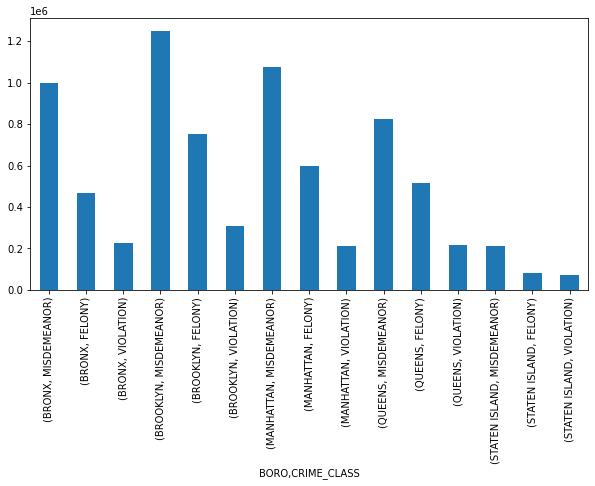

In [9]:
# A quick visualization of the above

df.groupby(['BORO'])['CRIME_CLASS'].value_counts().plot(kind = 'bar', figsize = (10, 5))

In [10]:
# df.head(25)
# df['OFNS_DESC'].isna().sum()
df['PD_DESC'].isna().sum()

6761

In [11]:
# Question 2

# Some incidents occurred in NYC parks, playgrounds or greenspaces.
# What crimes were reported most often and where?

# Again, let's begin by renaming columns.

df.rename(columns = {'PARKS_NM': 'PUBLIC_SPACE',
                     'PD_DESC': 'DESCRIPTION',
                     'ADDR_PCT_CD': 'PRECINCT',
                     'Lat_Lon': 'LOCATION',
                     'CMPLNT_FR_DT': 'DATE',
                     'CMPLNT_FR_TM': 'TIME'
                    }, inplace = True)

In [12]:
# PD_DESC and OFNS_DESC are both descriptions of the incident.
# The former is more granular, according to the data dictionary.
# Also, it has fewer NaNs.

In [13]:
# Let's choose public spaces to compare.

# df.head()
df['PUBLIC_SPACE'].sort_values(ascending = False).value_counts().head(15)

CENTRAL PARK                      1856
FLUSHING MEADOWS CORONA PARK      1532
CONEY ISLAND BEACH & BOARDWALK    1161
WASHINGTON SQUARE PARK            1063
RIVERSIDE PARK                     680
PROSPECT PARK                      616
UNION SQUARE PARK                  599
MARCUS GARVEY PARK                 469
RANDALL'S ISLAND PARK              454
SARA D. ROOSEVELT PARK             395
BRYANT PARK                        354
ST. MARY'S PARK BRONX              354
CLAREMONT PARK                     348
MACOMBS DAM PARK                   341
CROTONA PARK                       319
Name: PUBLIC_SPACE, dtype: int64

In [56]:
# Each of the top four have more than 1000 incidents.
# What kind of incidents occurred there?

subset = df[(df['PUBLIC_SPACE'] == 'CENTRAL PARK')
            | (df['PUBLIC_SPACE'] == 'FLUSHING MEADOWS CORONA PARK')
            | (df['PUBLIC_SPACE'] == 'CONEY ISLAND BEACH & BOARDWALK')
            | (df['PUBLIC_SPACE'] == 'WASHINGTON SQUARE PARK')
           ]
subset['DESCRIPTION'].value_counts().head(50)

LARCENY,PETIT FROM OPEN AREAS,                                  563
LARCENY,GRAND FROM OPEN AREAS, UNATTENDED                       501
ASSAULT 3                                                       473
CONTROLLED SUBSTANCE, POSSESSI                                  272
HARASSMENT,SUBD 3,4,5                                           252
CRIMINAL MISCHIEF 4TH, GRAFFIT                                  209
ASSAULT 2,1,UNCLASSIFIED                                        187
HARASSMENT,SUBD 1,CIVILIAN                                      187
MARIJUANA, POSSESSION 4 & 5                                     174
ROBBERY,OPEN AREA UNCLASSIFIED                                  143
LARCENY,PETIT OF VEHICLE ACCES                                  141
LARCENY,PETIT FROM BUILDING,UN                                  133
LARCENY,PETIT OF BICYCLE                                        131
ROBBERY,PERSONAL ELECTRONIC DEVICE                              115
LEWDNESS,PUBLIC                                 

In [61]:
# Many incidents. This is grim.
# Choose just a few (to avoid psychological fatigue).

bikes = subset[subset['DESCRIPTION'].str.contains('BICYCLE')]
cars = subset[subset['DESCRIPTION'].str.contains('VEHICLE')]

<AxesSubplot:xlabel='PUBLIC_SPACE'>

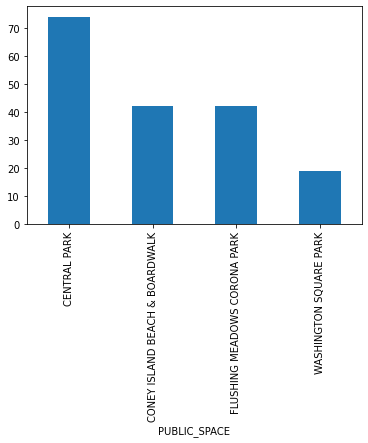

In [66]:
# Visualizations comparing these two incidents in each location
# I wonder if there's a way to combine them into one plot using different colors.

bikes.groupby(['PUBLIC_SPACE'])['DESCRIPTION'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='PUBLIC_SPACE'>

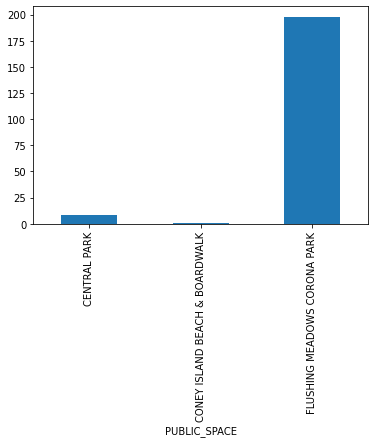

In [67]:
cars.groupby(['PUBLIC_SPACE'])['DESCRIPTION'].count().plot(kind = 'bar')

## Conclusions

### The dataset comprises NYPD criminal complaints from 2006 to 2019. The downloaded csv file contains more than 7 million rows and 35 columns. The complaint number for each row was found to be non-unique. Exploratory analysis shows the dataset to be well formatted, with mostly string type data providing time, date, location and descriptions of each incident. No columns seemed to contain numerical data that would merit any summary statistics.

### The first research question looks at the category of each incident and where those incidents occurred. I made a visualization to show the number of felony, misdemeanor and violations for each borough.

### The second research quesion intended to show the top criminal complaints that occurred in NYC parks, playgrounds and greenspaces. But the task was found to be a nauseating experience, so I abandoned it. Instead, I compared the number of bike and car incidents for each of these public spaces. All incidents involving bikes or cars were considered: e.g. theft of, assault with, damage to, etc. Plotting showed Central Park to be where the greatest number of bike incidents occurred, but very few car incidents. Surprisingly, Flushing Meadows Park was very high for cars, whereas Washington Square Park had no car incidents at all.